In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import random

# Set the seed
random.seed(19)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv("/content/drive/My Drive/DataThesis/BETN073/working_data.csv")

In [3]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select columns to normalize
columns_to_normalize = ['Concentration']

# Fit and transform the selected columns
data_normalized = data.copy()  # Make a copy to avoid modifying the original data
data_normalized[columns_to_normalize] = scaler.fit_transform(data_normalized[columns_to_normalize])

data_normalized = data_normalized[data_normalized['Year'] != 2008]
data_normalized = data_normalized.reset_index()
data_normalized = data_normalized.drop(columns='index')

# Display the normalized data
print(data_normalized)

      Year  Month  Day  Concentration  DayOfWeek  Weekend
0     2009      1    1       0.041503          4        0
1     2009      1    2       0.019506          5        0
2     2009      1    3       0.027512          6        1
3     2009      1    4       0.069484          0        1
4     2009      1    5       0.137438          1        0
...    ...    ...  ...            ...        ...      ...
3983  2019     12   27       0.174413          5        0
3984  2019     12   28       0.146468          6        1
3985  2019     12   29       0.134440          0        1
3986  2019     12   30       0.254002          1        0
3987  2019     12   31       0.086472          2        0

[3988 rows x 6 columns]


In [4]:
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Set 'Date' as the index
#data.set_index('Date', inplace=True)

data.head()

,Year,Month,Day,Concentration,DayOfWeek,Weekend,Date
0,2008,1,1,7.583333,2,0,2008-01-01
1,2008,1,2,40.227273,3,0,2008-01-02
2,2008,1,3,33.958333,4,0,2008-01-03
3,2008,1,4,27.913043,5,0,2008-01-04
4,2008,1,5,63.304348,6,1,2008-01-05


# Graphs for Grouped Data

## **Day Graphs (number)**

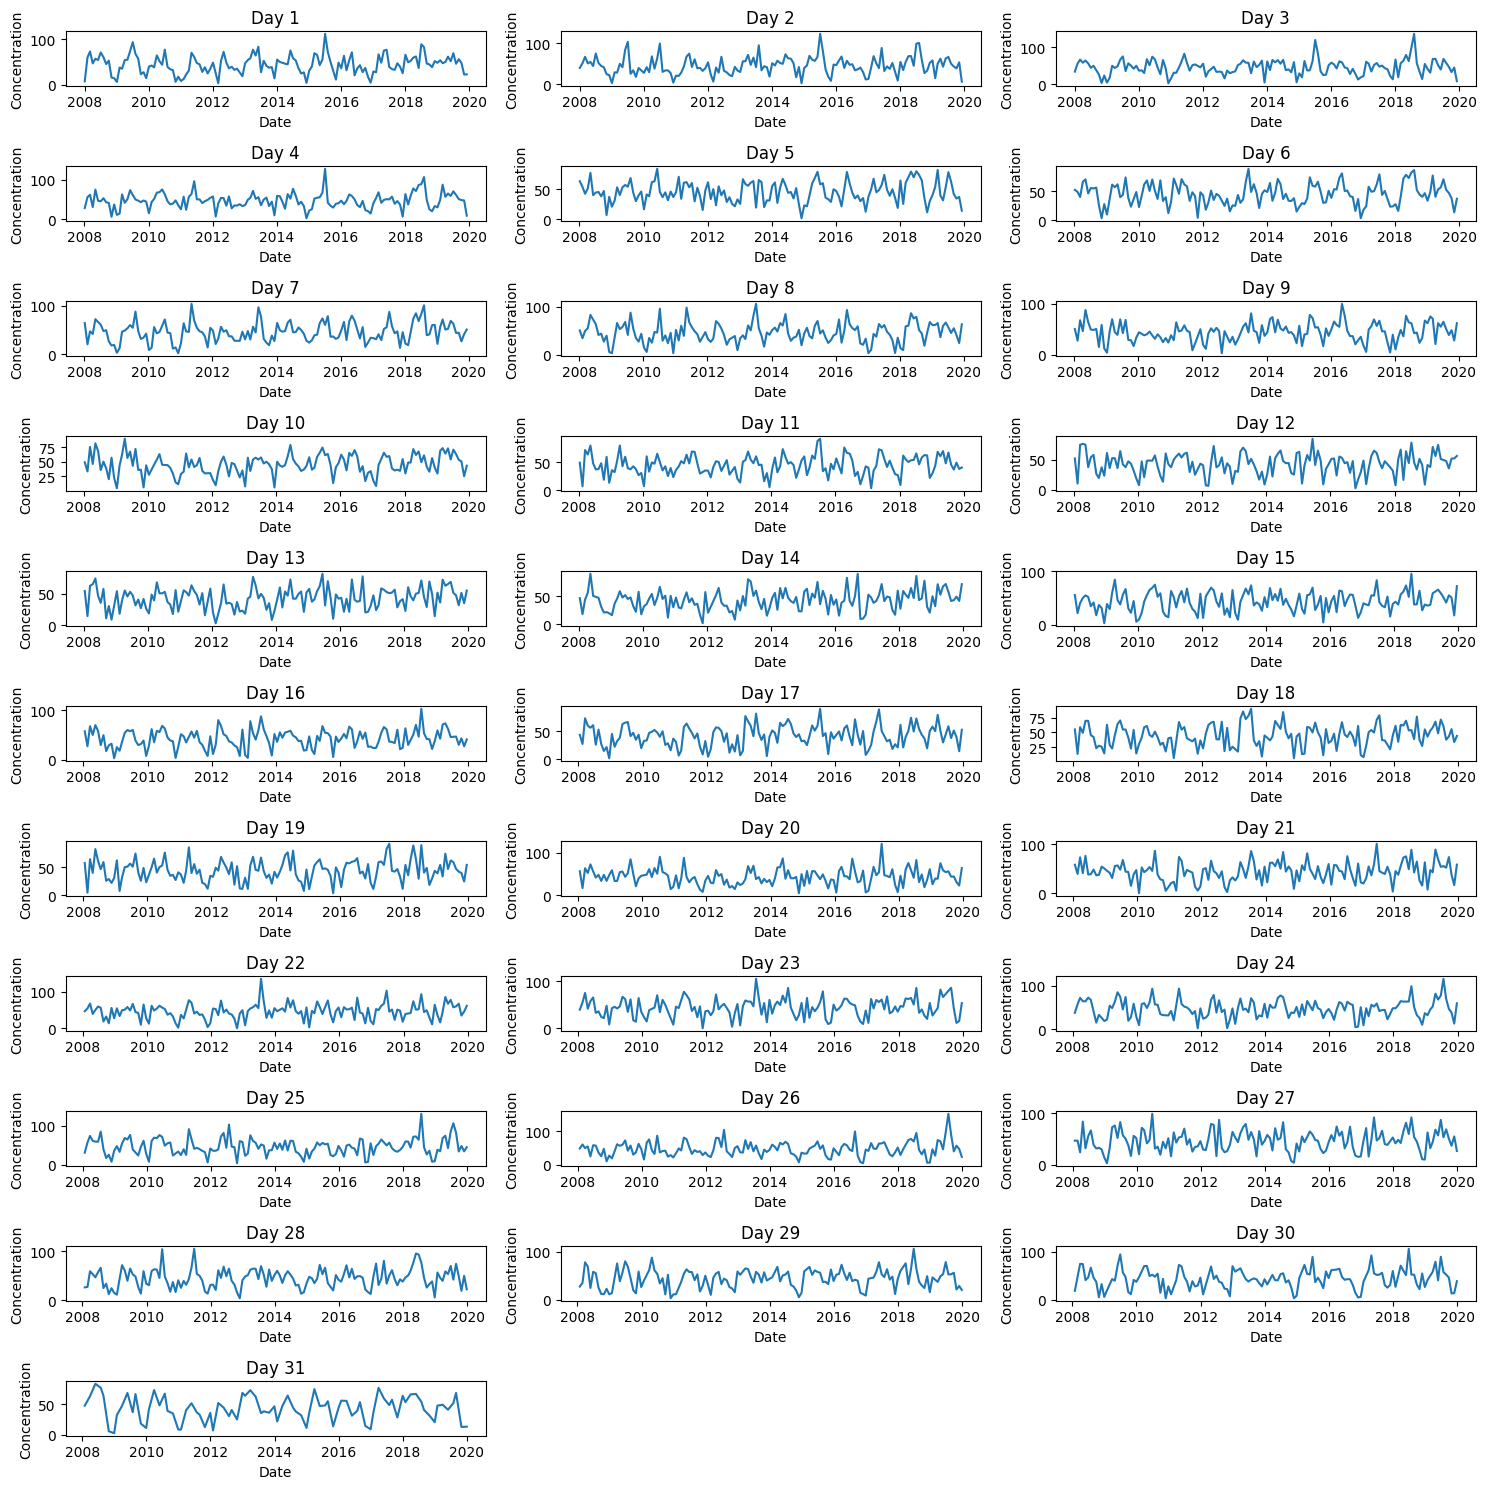

In [5]:
grouped_data = data.groupby(data['Date'].dt.day)

# Get the number of days in the month
num_days = len(grouped_data)

# Define the number of columns for subplots (e.g., 4 columns for 31 days)
num_cols = 3

# Calculate the number of rows needed for subplots
num_rows = (num_days + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes if num_rows > 1
axs = axs.flatten() if num_rows > 1 else [axs]

# Iterate over each group and plot the data
for i, (day, group) in enumerate(grouped_data):
    ax = axs[i]
    ax.plot(group['Date'], group['Concentration'])
    ax.set_title(f'Day {day}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Concentration')

# Hide empty subplots
for j in range(num_days, num_cols * num_rows):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## **Month Graphs**

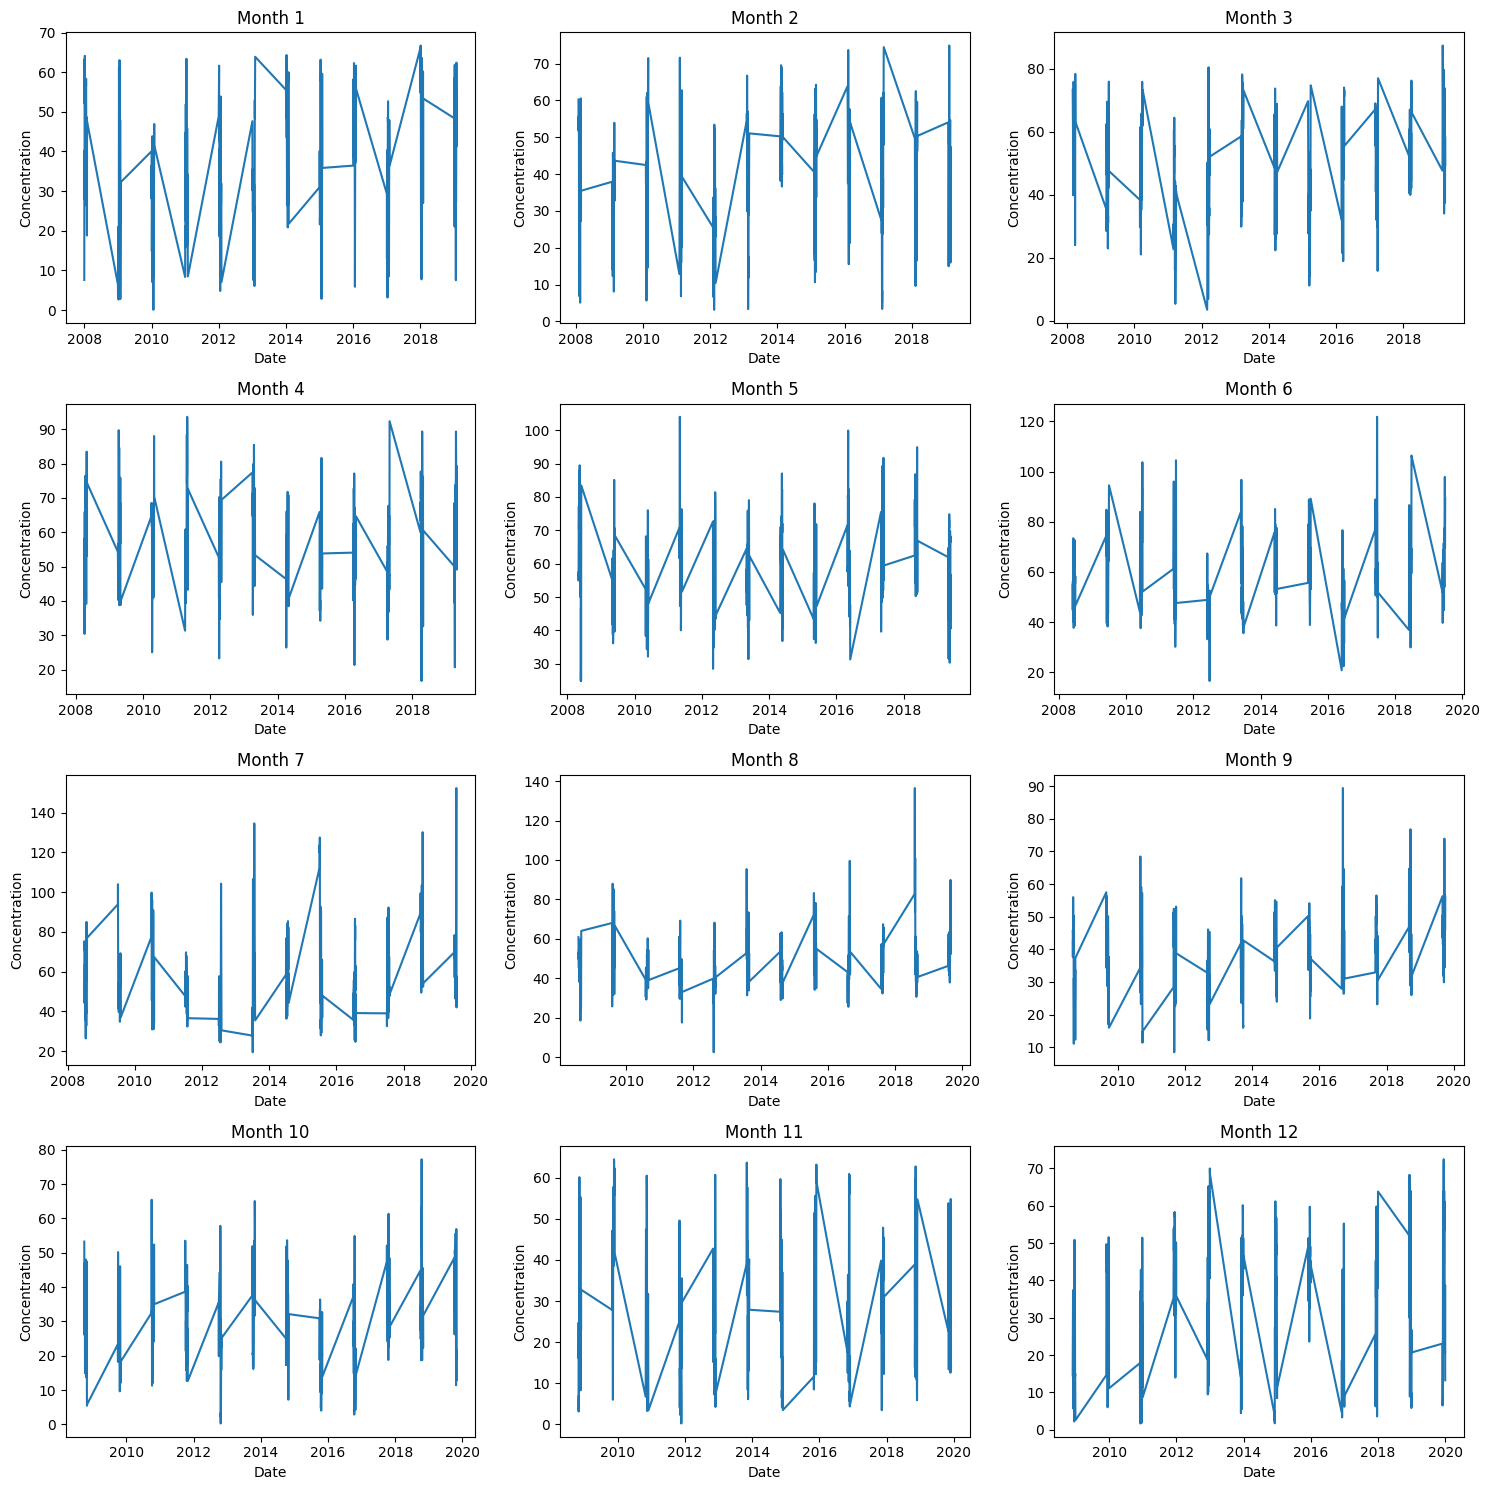

In [6]:
grouped_data = data.groupby(data['Date'].dt.month)

# Get the number of days in the month
num_days = len(grouped_data)

# Define the number of columns for subplots (e.g., 4 columns for 31 days)
num_cols = 3

# Calculate the number of rows needed for subplots
num_rows = (num_days + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes if num_rows > 1
axs = axs.flatten() if num_rows > 1 else [axs]

# Iterate over each group and plot the data
for i, (day, group) in enumerate(grouped_data):
    ax = axs[i]
    ax.plot(group['Date'], group['Concentration'])
    ax.set_title(f'Month {day}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Concentration')

# Hide empty subplots
for j in range(num_days, num_cols * num_rows):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## **Year Graphs**

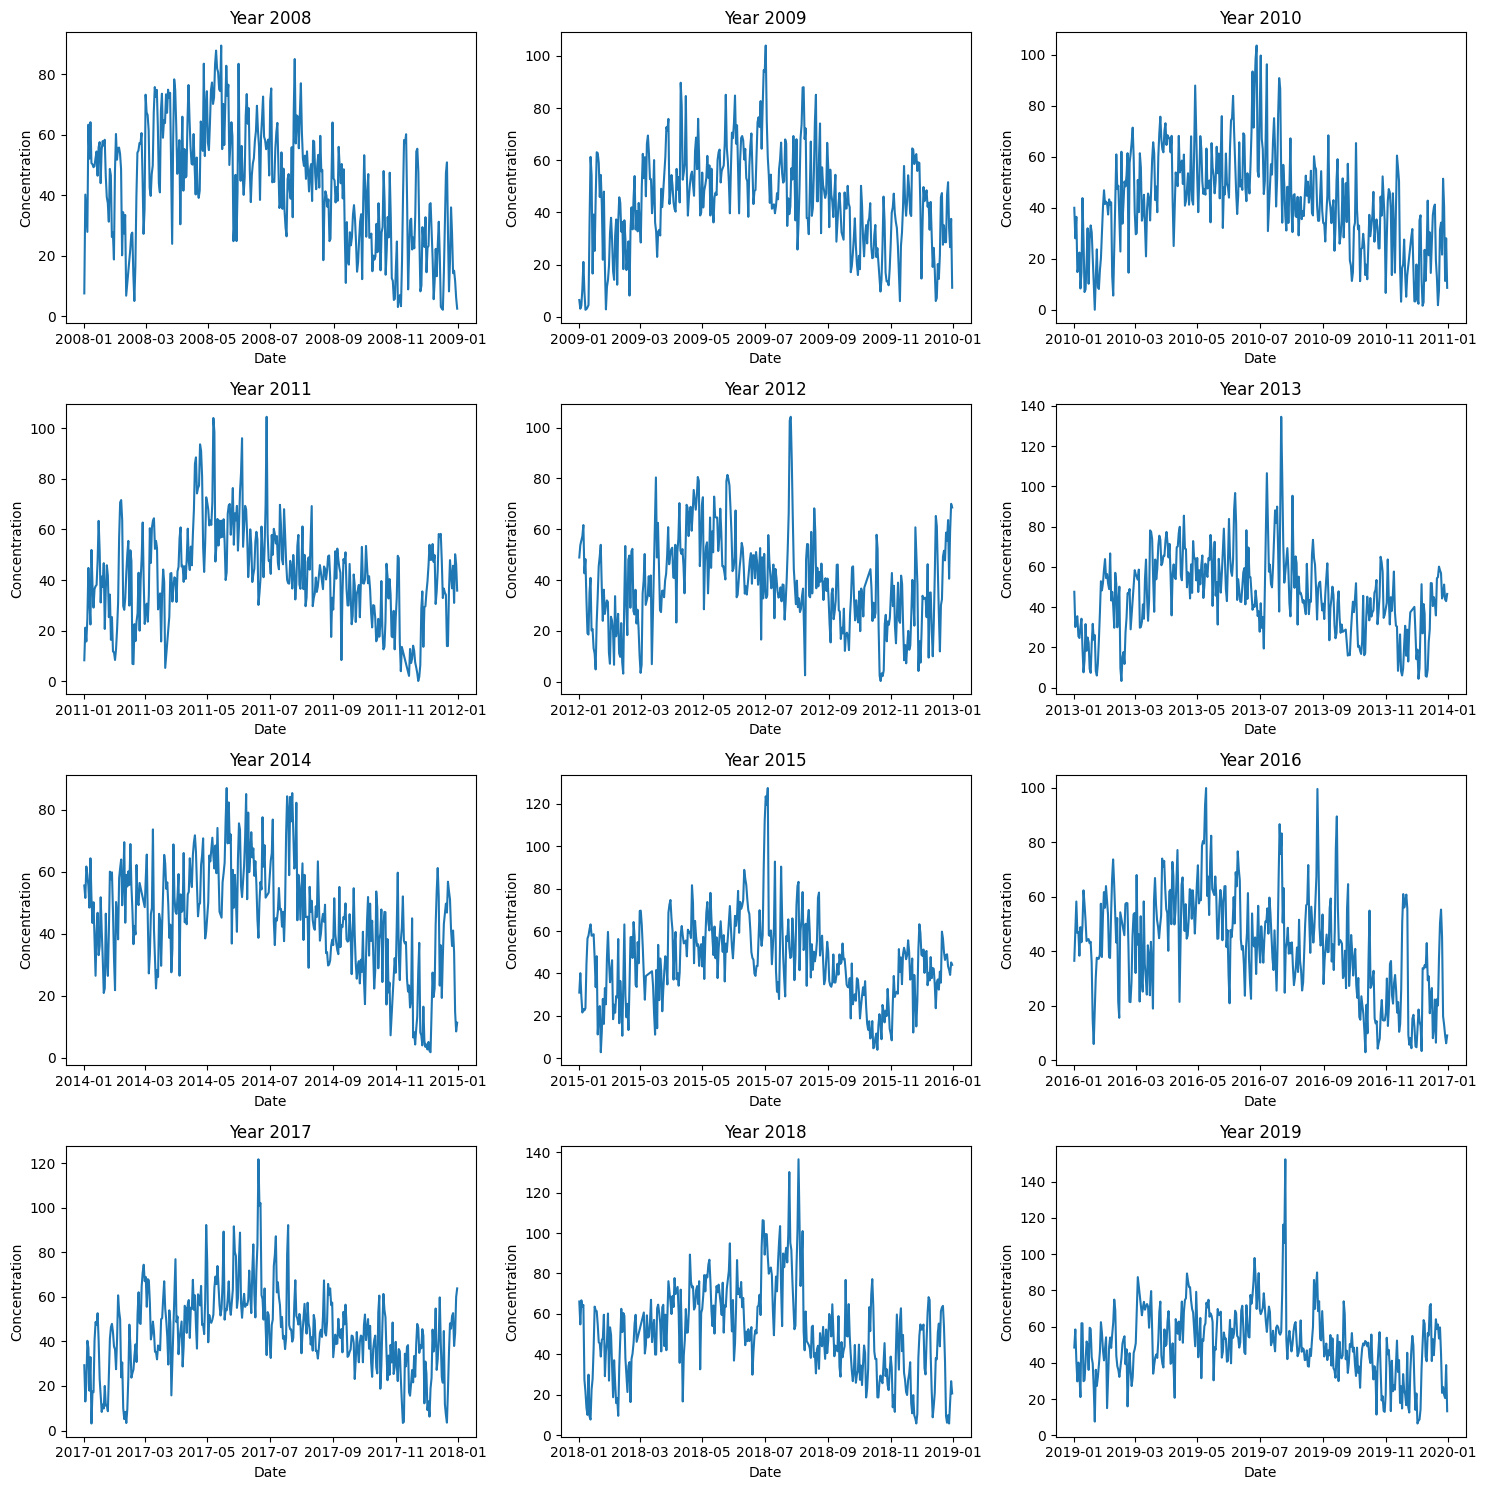

In [7]:
grouped_data = data.groupby(data['Date'].dt.year)

# Get the number of days in the month
num_days = len(grouped_data)

# Define the number of columns for subplots (e.g., 4 columns for 31 days)
num_cols = 3

# Calculate the number of rows needed for subplots
num_rows = (num_days + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes if num_rows > 1
axs = axs.flatten() if num_rows > 1 else [axs]

# Iterate over each group and plot the data
for i, (day, group) in enumerate(grouped_data):
    ax = axs[i]
    ax.plot(group['Date'], group['Concentration'])
    ax.set_title(f'Year {day}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Concentration')

# Hide empty subplots
for j in range(num_days, num_cols * num_rows):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## **Graphs for each Day: Monday (0) -> Sunday (6)**

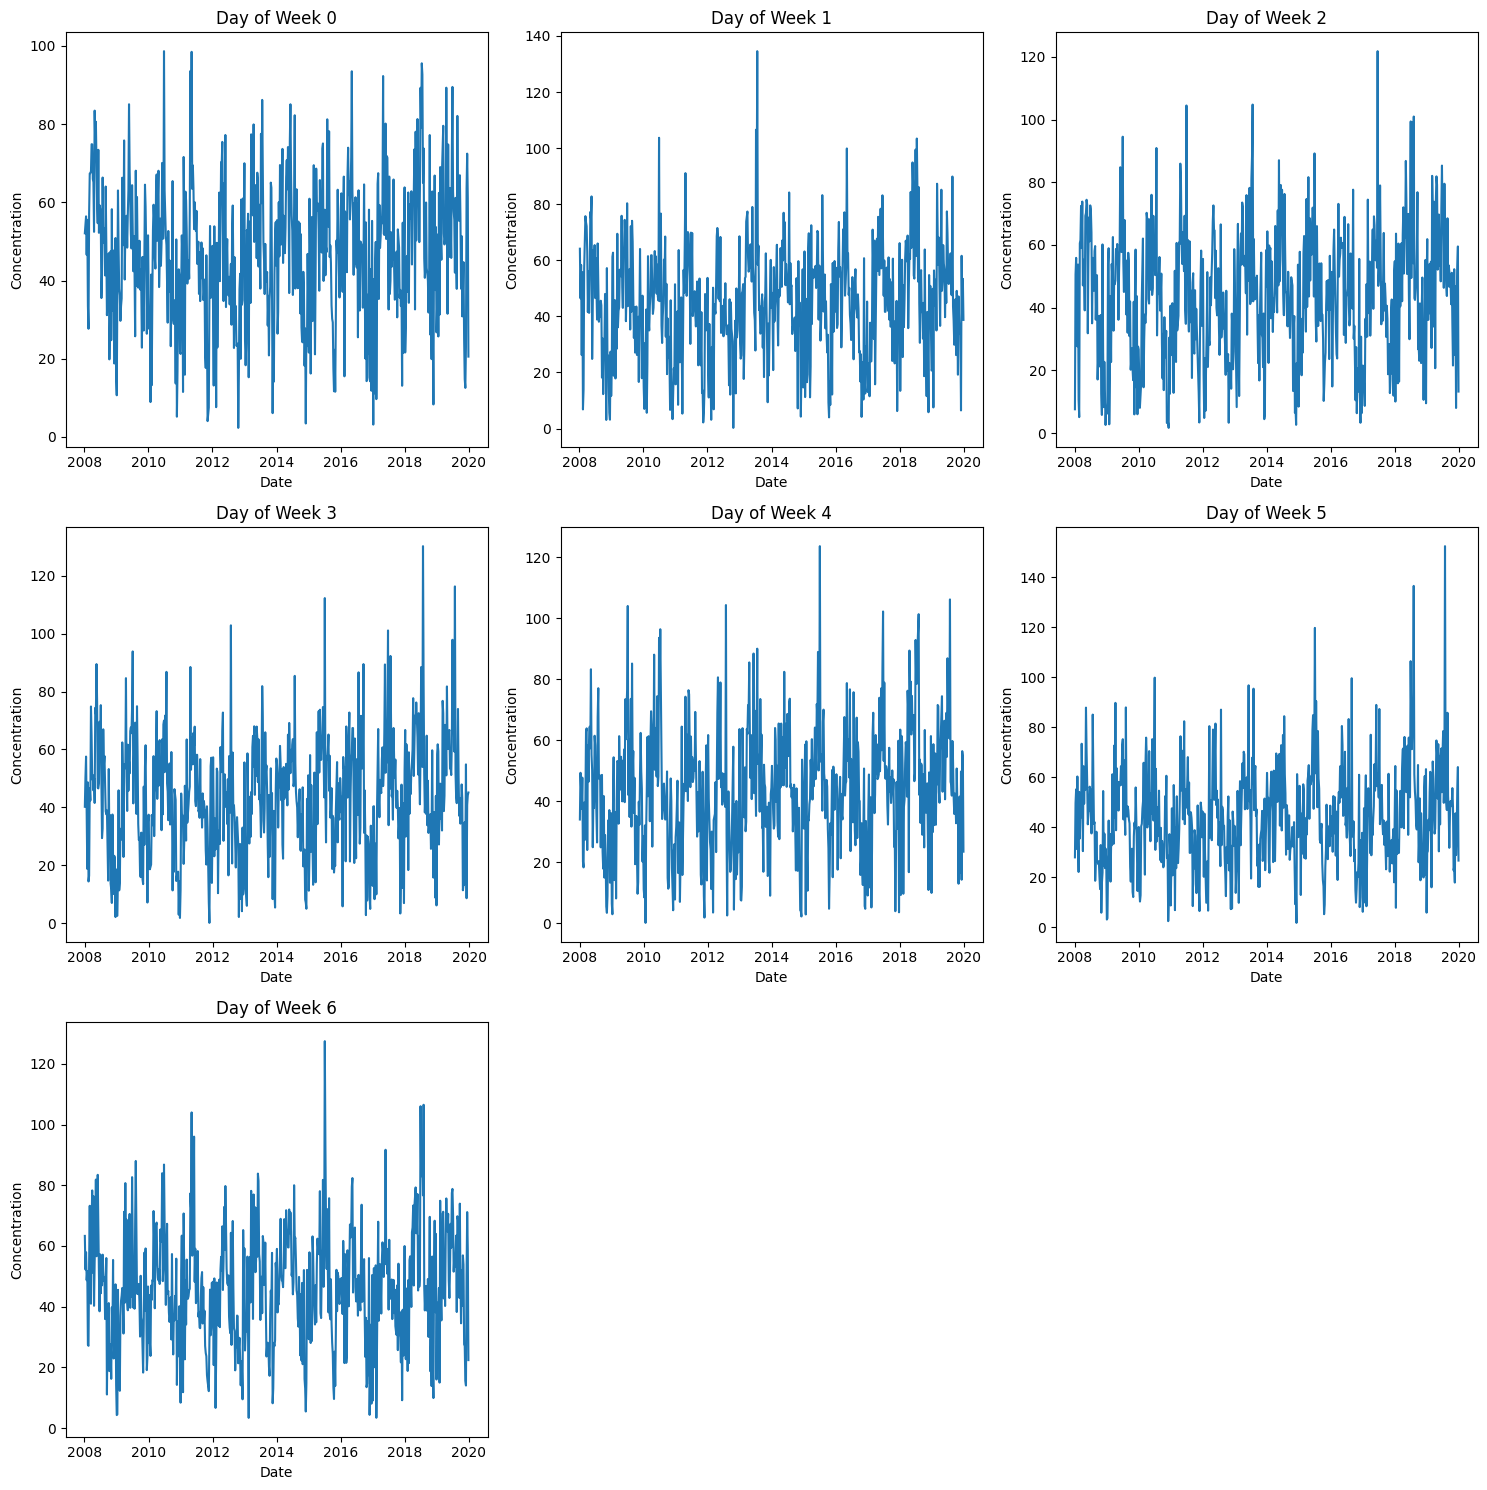

In [8]:
grouped_data = data.groupby(data['DayOfWeek'])

# Get the number of days in the month
num_days = len(grouped_data)

# Define the number of columns for subplots (e.g., 4 columns for 31 days)
num_cols = 3

# Calculate the number of rows needed for subplots
num_rows = (num_days + num_cols - 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes if num_rows > 1
axs = axs.flatten() if num_rows > 1 else [axs]

# Iterate over each group and plot the data
for i, (day, group) in enumerate(grouped_data):
    ax = axs[i]
    ax.plot(group['Date'], group['Concentration'])
    ax.set_title(f'Day of Week {day}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Concentration')

# Hide empty subplots
for j in range(num_days, num_cols * num_rows):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## **Weekend Graphs**

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

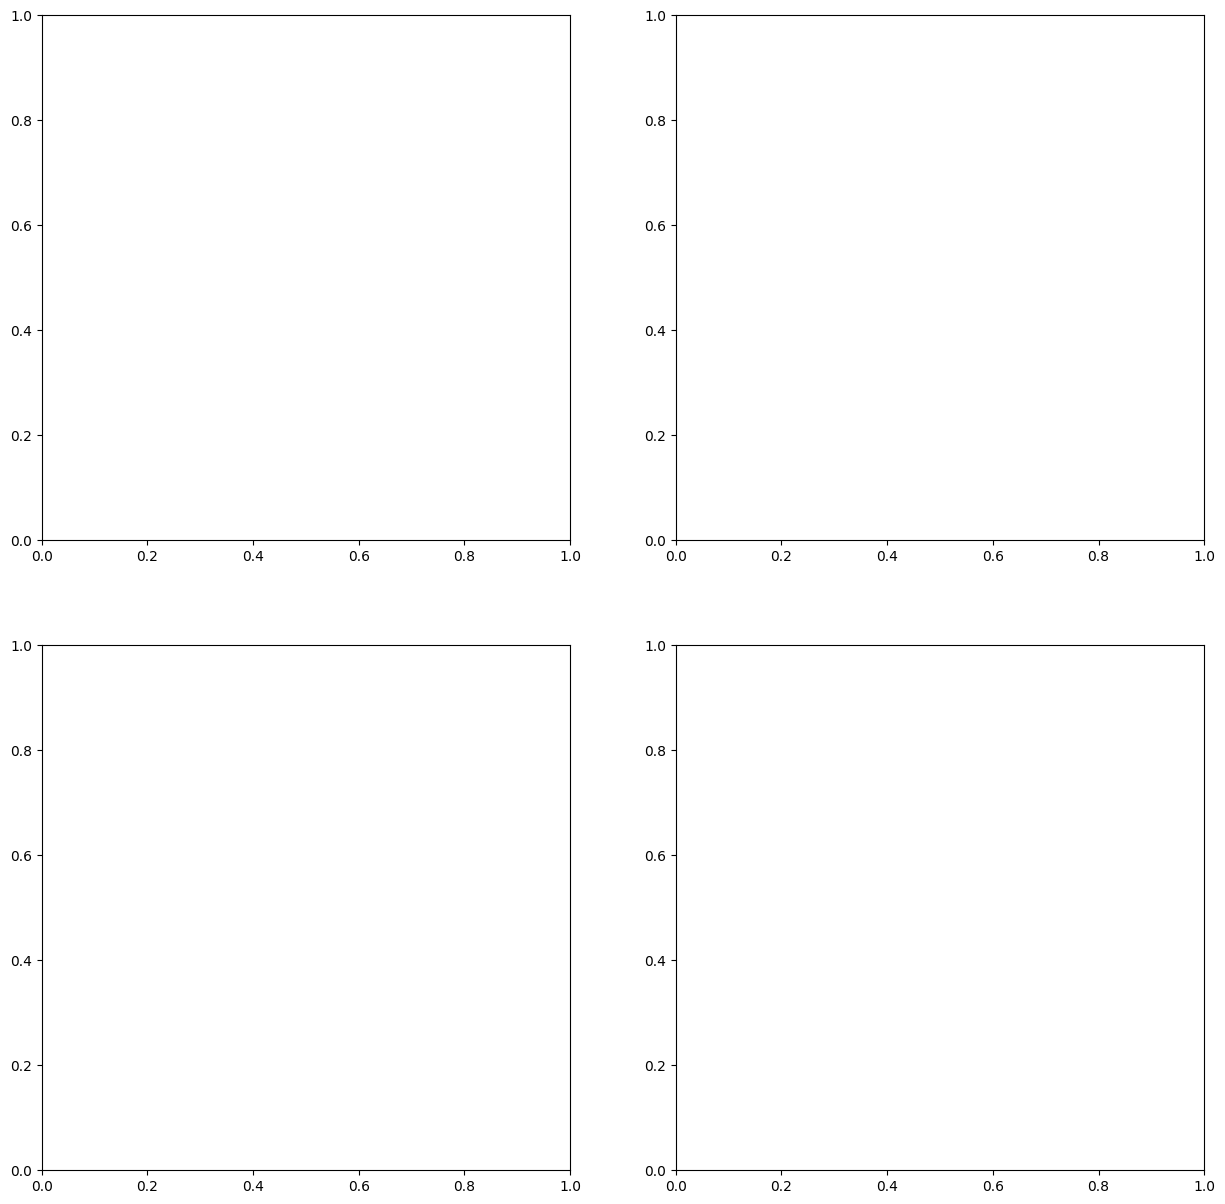

In [10]:
grouped_data = data.groupby(data['Weekend'])

# Get the number of options in the month
num_options = len(grouped_data)

# Define the number of columns for subplots (e.g., 4 columns for 31 days)
num_cols = 2

# Calculate the number of rows needed for subplots
num_rows = 2

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over each group and plot the data
for i, (day, group) in enumerate(grouped_data):
    ax = axs[i]
    ax.plot(group['Date'], group['Concentration'])
    ax.set_title(f'Weekend: {day}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Concentration')

# Hide empty subplots
for j in range(num_days, num_cols * num_rows):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# Outlier Detection

In [11]:
describe_full = data['Concentration'].describe()
describe_full

count    4354.000000
mean       44.966454
std        19.353543
min         0.071429
25%        32.729167
50%        45.239130
75%        57.223098
max       152.347826
Name: Concentration, dtype: float64

In [15]:
concentration_values = data['Concentration']

In [16]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = concentration_values.quantile(0.25)
Q3 = concentration_values.quantile(0.75)

# Interquartile Range (IQR)
IQR = Q3 - Q1

# Boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = ((concentration_values < lower_bound) | (concentration_values > upper_bound)).sum()

# Print the count
print("Number of outliers in 'column_name':", outliers_count)

Number of outliers in 'column_name': 44


In [17]:
outlier_indices = concentration_values[(concentration_values < lower_bound) | (concentration_values > upper_bound)].index

# Remove the outliers from the DataFrame
char_ozone_clean_IQR = data.drop(outlier_indices)

# Here I reset index
char_ozone_clean_IQR.reset_index(drop=True, inplace=True)

In [18]:
describe_IQR = char_ozone_clean_IQR['Concentration'].describe()

In [19]:
# Calculate mean and standard deviation
mean = concentration_values.mean()
std_dev = concentration_values.std()

# Calculate Z-scores
z_scores = (concentration_values - mean) / std_dev

# Define the threshold for outliers
threshold = 3  # Adjust as needed based on your requirements

# Get the indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

print("Number of outliers in 'Concentrations' using Z-score:", len(outlier_indices))

# Remove the outliers from the DataFrame
char_ozone_clean_zscore = data.drop(outlier_indices)

# Index Reset
char_ozone_clean_zscore.reset_index(drop=True, inplace=True)

Number of outliers in 'Concentrations' using Z-score: 22


In [20]:
describe_zscore = char_ozone_clean_zscore['Concentration'].describe()

In [21]:
describe_full = pd.DataFrame(describe_full)
describe_IQR = pd.DataFrame(describe_IQR)
describe_zscore = pd.DataFrame(describe_zscore)

comparison = pd.concat([describe_full['Concentration'], describe_IQR['Concentration'], describe_zscore['Concentration']], axis=1)
comparison.columns = ['Full Data', 'IQR Outlier Removal', 'Z-score Outlier Removal']

comparison

,Full Data,IQR Outlier Removal,Z-score Outlier Removal
count,4354.000000,4310.000000,4332.000000
mean,44.966454,44.335092,44.609707
std,19.353543,18.364469,18.717600
min,0.071429,0.071429,0.071429
25%,32.729167,32.489583,32.605072
50%,45.239130,44.956522,45.108696
75%,57.223098,56.739130,57.042120
max,152.347826,93.833333,102.833333


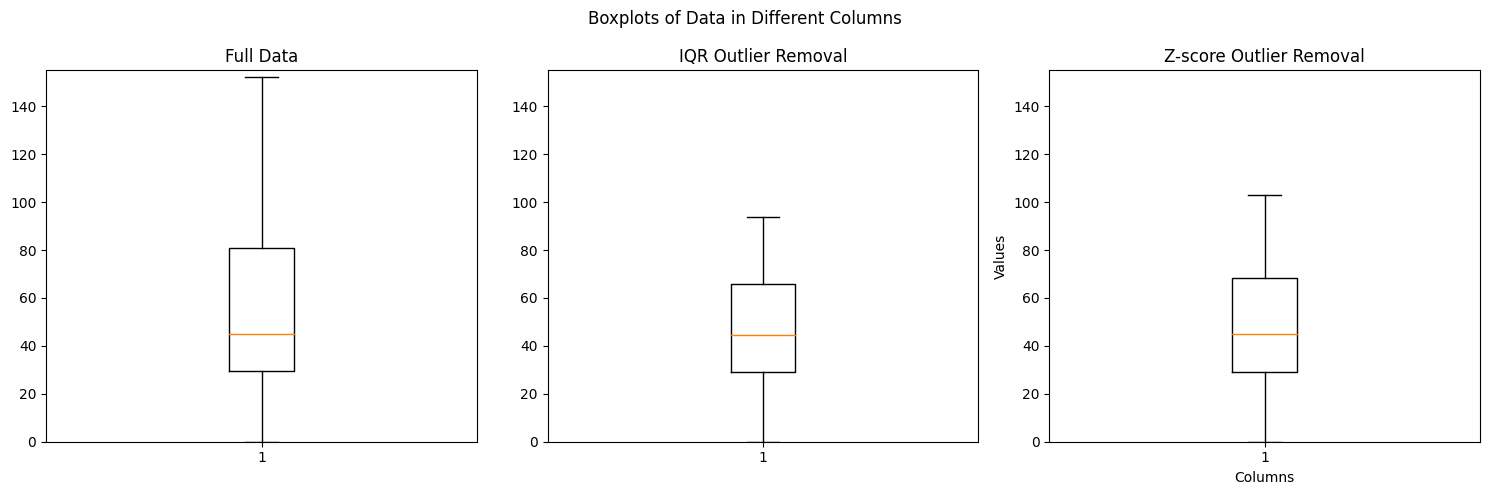

In [24]:
columns_to_plot = ['Full Data', 'IQR Outlier Removal', 'Z-score Outlier Removal']

# Create a figure and axis object
fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

# Iterate over the columns and plot boxplots
for i, column in enumerate(columns_to_plot):
    axs[i].boxplot(comparison[column])
    axs[i].set_title(column)

    # Set y-axis limits
    axs[i].set_ylim(0, 155)  # Adjust the limits as needed

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.suptitle('Boxplots of Data in Different Columns')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()